In [198]:
import pandas as pd
import numpy as np

In [199]:
!pip install nibabel

In [200]:
!pip install scipy

In [201]:
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import os

In [202]:
# importing nii file

image = nib.load("data/raw/T2_UT168.nii")
image

In [203]:
# reading data
print(image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 2.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221103_UT168_silocin/5/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -6.7

In [204]:
mask = nib.load('data/mask/T2_UT168.nii')
mask

In [205]:
print(mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.70710677
quatern_c       : -2.1648903e-17
quatern_d       : 2.1648903e-17
qoffset_x       : -6.75533
qoffset_y       : -5.663706
qoffset_z       : 6.88325
sr

In [206]:
os.listdir('data')

['resampled', 'raw', 'mask', 'matlab_raw_mask']

In [207]:
brain_vol_data = image.get_fdata()
type(brain_vol_data)

numpy.ndarray

In [208]:
brain_vol_data.shape

(128, 160, 96)

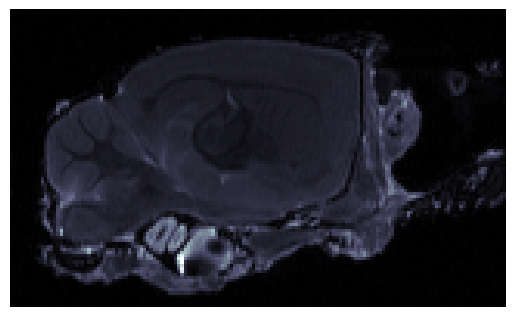

In [249]:
plt.imshow(ndi.rotate(brain_vol_data[90], -90), cmap='bone')
plt.axis('off')
plt.show()

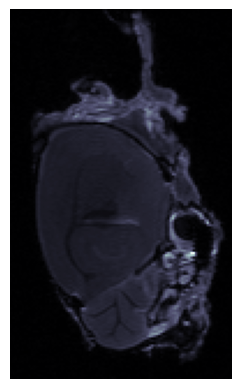

In [247]:
plt.imshow(brain_vol_data[95], cmap='bone')
plt.axis('off')
plt.show()

In [210]:
!pip install nilearn

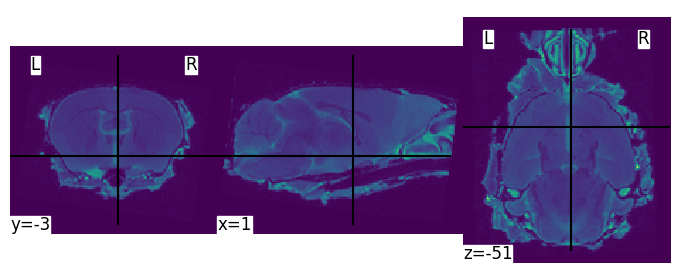

In [211]:
from nilearn import plotting

# raw data image
plotting.plot_img(image)
plt.show()

In [212]:
brain_mask_data = mask.get_fdata()
type(brain_mask_data)

numpy.memmap

In [213]:
brain_mask_data.shape

(128, 160, 96)

In [214]:
brain_mask_data.shape == brain_vol_data.shape

True

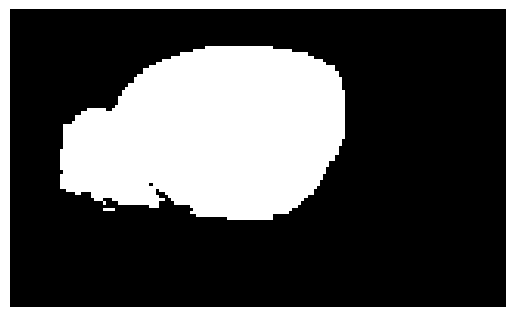

In [250]:
plt.imshow(ndi.rotate(brain_mask_data[96], -90), cmap='bone')
plt.axis('off')
plt.show()

# Applying resample for mask

In [216]:
from nilearn.image import resample_to_img

In [217]:
# loading 2 img again
raw_img = nib.load('data/raw/T2_UT168.nii')
mask_img = nib.load('data/mask/T2_UT168.nii')

In [218]:
print(raw_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 2.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221103_UT168_silocin/5/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -6.7

In [219]:
print(mask_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (128, 160, 96)
affine:
[[ 1.00000001e-01 -1.04794686e-25 -6.12323426e-18 -6.75533009e+00]
 [ 6.12323426e-18  3.42285422e-09  1.00000001e-01 -5.66370583e+00]
 [ 1.04794686e-25 -1.00000001e-01  3.42285422e-09  6.88325024e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_d

In [220]:
# resampling
resampled_mask = resample_to_img(mask_img, raw_img)
resampled_mask

/home/sharapova/anaconda3/envs/mribase/lib/python3.10/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(


In [252]:
print(resampled_mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.         1.         1.         0.99999994 1.         1.
 1.         1.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.9953362
quatern_c       : 0.015365392
quatern_d       : -0.07107702
qoffset_x       : -61.13606
qoffset_y     

In [258]:
header = raw_img.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 2.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221103_UT168_silocin/5/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -6.7

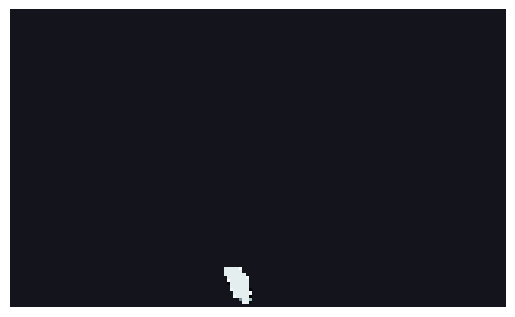

In [251]:
img_resampled = resampled_mask.get_fdata()

plt.imshow(ndi.rotate(img_resampled[60], 90), cmap='bone')
plt.axis('off')
plt.show()

In [223]:
#saving mask
resampled_mask.to_filename('data/resampled/resampled_mask.nii')

#### Above code did not successfully returned expected result

# Trying new aproach

In [224]:
# loading imges again
raw_img = nib.load('data/raw/T2_UT168.nii')
mask_img = nib.load('data/mask/T2_UT168.nii')

In [255]:
print(raw_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 2.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221103_UT168_silocin/5/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -6.7

In [225]:
resampled_mask = resample_to_img(mask_img, raw_img)
print(resampled_mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.         1.         1.         0.99999994 1.         1.
 1.         1.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.9953362
quatern_c       : 0.015365392
quatern_d       : -0.07107702
qoffset_x       : -61.13606
qoffset_y     

/home/sharapova/anaconda3/envs/mribase/lib/python3.10/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(


In [226]:
resampled_mask.ndim

3

In [227]:
resampled_mask.shape

(128, 160, 96)

In [228]:
resampled_mask_data = resampled_mask.get_fdata().astype(np.int8)
print(resampled_mask_data)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


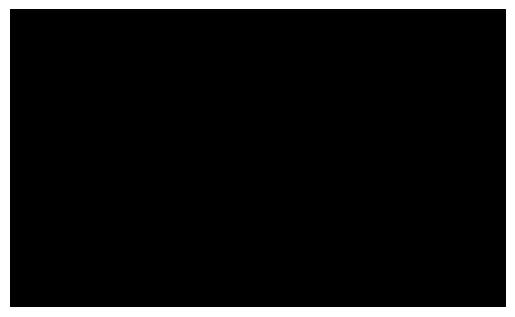

In [229]:

plt.imshow(ndi.rotate(resampled_mask_data[40], 90), cmap='bone')
plt.axis('off')
plt.show()

In [230]:
# generating new mask for resampl
new_mask = nib.Nifti1Image(resampled_mask_data, raw_img.affine)

In [231]:
new_mask_header = new_mask.header
raw_header = raw_img.header

In [232]:
new_mask_header == raw_header

False

In [233]:
new_mask_header['pixdim'] = raw_header['pixdim']
new_mask_header.set_data_dtype(raw_header.get_data_dtype())

In [234]:
new_mask.to_filename('data/resampled/resampled_mask_n1.nii')

# Still not working as expected. Checking data processed by matlab

In [235]:
mat_img = nib.load('data/matlab_raw_mask/T2_UT224.nii')
mat_img_mask = nib.load('data/matlab_raw_mask/Brain_mask_UT224.nii')

In [236]:
print(mat_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 3.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221216_UT224_ctl/4/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -7.20760

In [237]:
print(mat_img_mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   1   1   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 3.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221216_UT224_ctl/4/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -7.207601

In [238]:
print(mat_img.header == mat_img_mask.header)

False


In [239]:
matlab_mask = mat_img_mask.get_fdata()

In [254]:
    print(mat_img_mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   1   1   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 3.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221216_UT224_ctl/4/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -7.207601

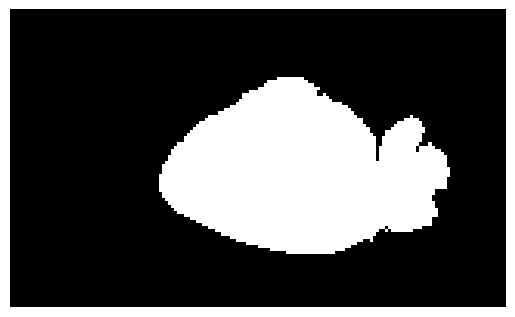

In [246]:
plt.imshow(ndi.rotate(matlab_mask[30], 90), cmap='bone')
plt.axis('off')
plt.show()

In [241]:
image_raw = nib.load('data/raw/T2_UT168.nii')
image_mask = nib.load('data/mask/T2_UT168.nii')


In [242]:
print(image_raw.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 2.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221103_UT168_silocin/5/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -6.7

In [243]:
print(image_mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 160  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.70710677
quatern_c       : -2.1648903e-17
quatern_d       : 2.1648903e-17
qoffset_x       : -6.75533
qoffset_y       : -5.663706
qoffset_z       : 6.88325
sr